**EMERGING METHODS FOR EARLY DETECTION OF FOREST FIRE**

TEAM ID:PNT2022TMID34027

**Importing Keras libraries**

In [19]:
import keras

**Importing ImageDataGenerator from Keras**

In [20]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

**Defining the Parameters**

In [21]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

**Applying ImageDataGenerator functionality to train dataset**


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/drive/dataset/Dataset/Dataset/train_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


**Applying ImageDataGenerator functionality to test dataset**

In [10]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/drive/dataset/Dataset/Dataset/test_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


**Importing Model Building Libraries**

In [24]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

**Initializing the model**

In [22]:
model=Sequential()

**Adding CNN Layers**

In [23]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

**Add Dense layers**

In [25]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

**Configuring the learning process**

In [26]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

**Training the model**

In [16]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 257s 18s/step - loss: 2.0168 - accuracy: 0.6927 - val_loss: 0.3965 - val_accuracy: 0.8843
Epoch 2/10
14/14 [==============================] - 20s 1s/step - loss: 0.2476 - accuracy: 0.8945 - val_loss: 0.0964 - val_accuracy: 0.9669
Epoch 3/10
14/14 [==============================] - 23s 2s/step - loss: 0.1830 - accuracy: 0.9266 - val_loss: 0.0839 - val_accuracy: 0.9587
Epoch 4/10
14/14 [==============================] - 23s 2s/step - loss: 0.1935 - accuracy: 0.9083 - val_loss: 0.0850 - val_accuracy: 0.9587
Epoch 5/10
14/14 [==============================] - 23s 2s/step - loss: 0.1661 - accuracy: 0.9220 - val_loss: 0.0945 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 22s 2s/step - loss: 0.1518 - accuracy: 0.9358 - val_loss: 0.1245 - val_accuracy: 0.9587
Epoch 7/10
14/14 [==============================] - 24s 2s/step - loss: 0.1458 - accuracy: 0.9427 - val_loss: 0.0586 - val_accuracy: 0.9917
Epoch 8/10
14/14 [

**Save the model**

In [17]:
model.save("forest.h5")

**Predictions**

In [27]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model('forest.h5')
img=image.load_img('/content/drive/MyDrive/drive/dataset/Dataset/Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

**Open cv for video processing**

In [28]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 10.2 MB/s 


In [29]:
from twilio.rest import Client

In [30]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package

**Sending alert Message**

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [34]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/drive/dataset/Dataset/Dataset/train_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 436 images belonging to 2 classes.


In [35]:
test_dataset = test.flow_from_directory("/content/drive/MyDrive/drive/dataset/Dataset/Dataset/test_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [36]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [37]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [38]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [39]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [40]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [41]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
14/14 [==============================] - 23s 2s/step - loss: 0.5283 - accuracy: 0.7294 - val_loss: 0.1872 - val_accuracy: 0.9421
Epoch 2/5
14/14 [==============================] - 22s 2s/step - loss: 0.2845 - accuracy: 0.8647 - val_loss: 0.2339 - val_accuracy: 0.8926
Epoch 3/5
14/14 [==============================] - 23s 2s/step - loss: 0.1698 - accuracy: 0.9358 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 4/5
14/14 [==============================] - 21s 1s/step - loss: 0.1655 - accuracy: 0.9404 - val_loss: 0.0394 - val_accuracy: 1.0000
Epoch 5/5
14/14 [==============================] - 22s 2s/step - loss: 0.1604 - accuracy: 0.9266 - val_loss: 0.0275 - val_accuracy: 1.0000


In [42]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 5s 1s/step


In [43]:
predictions

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [44]:
print(len(predictions))

121


In [45]:
model.save("/content/drive/MyDrive/drive/dataset/Dataset/Dataset/train_set/forest")

In [46]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [47]:
model = load_model("/content/drive/MyDrive/drive/dataset/Dataset/Dataset/train_set/forest")

In [48]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(128,128))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [49]:
predictImage("/content/drive/MyDrive/drive/dataset/Dataset/Dataset/test_set/with fire/19464620_401.jpg")

1/1 [==============================] - 0s 108ms/step
[[1.]]
 fire


In [50]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=fc5dc55e75316066cfbb4ac5132e81394ece3314d29f346304a5b95e308fd28d
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [52]:
img = image.load_img('/content/drive/MyDrive/drive/dataset/Dataset/Dataset/train_set/with fire/with fire (10).jpg',target_size=(100,100))

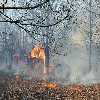

In [53]:
img

In [54]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

**Testing with fire**

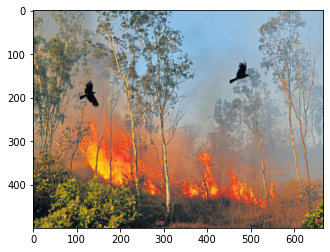

In [55]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model('forest.h5')
img=image.load_img('/content/drive/MyDrive/drive/dataset/Dataset/Dataset/test_set/with fire/599857.jpg')
x=image.img_to_array(img)
plt.imshow(img)
plt.show()
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [56]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 67ms/step


1

In [57]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  from twilio.rest import Client
  account_sid='ACd09c7dfa196789687483788953bc13024c09a'
  auth_token='e9b6b25a77c65fg33643746ge0ba0b755'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire not is detected,stay alert',
      from_='+16075363954',
      to='+917639764251')
  print(message.sid)
  print("no fire")
  print("no danger")
elif pred==1:
  print(' Fire detected')
  print('SMS sent')

 Fire detected
SMS sent


**Testing without fire**

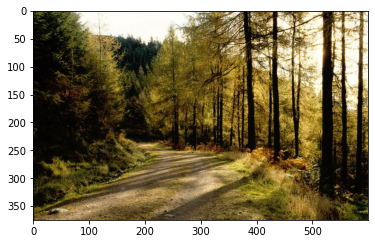

In [58]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model('forest.h5')
img=image.load_img('/content/drive/MyDrive/drive/dataset/Dataset/Dataset/test_set/forest/1009821.jpg')
x=image.img_to_array(img)
plt.imshow(img)
plt.show()
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [59]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 67ms/step


0

In [60]:
if pred==1:
  print('Forest fire')
  from twilio.rest import Client
  account_sid='ACd09c7dfa196789687483788953bc13024c09a'
  auth_token='e9b6b25a77c65fg33643746ge0ba0b755'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      from_='+16075363954',
      to='+917639764251')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==0:
  print('No Fire')

No Fire
